In [1]:
# lib import
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# read input data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
subm = pd.read_csv('../input/sample_submission.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [5]:
train['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [6]:
# comment length
lens = train.comment_text.str.len()

In [10]:
lens.head(10)

0    264
1    112
2    233
3    622
4     67
5     65
6     44
7    115
8    472
9     70
Name: comment_text, dtype: int64

In [11]:
# mean / std / max  of comment length
lens.mean(),lens.std(),lens.max()

(394.0732213246768, 590.7202819048919, 5000)

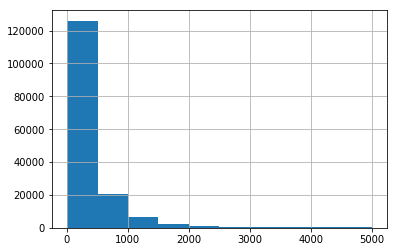

In [12]:
lens.hist()

In [14]:
# summarize the dataset
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)

In [19]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [15]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
len(train),len(test)

(159571, 153164)

In [21]:
# Convert NaN to "unknown"
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

### Building the model

In [22]:
import re, string

In [23]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

In [24]:
def tokenize(s):return re_tok.sub(r'\1 ',s).split()

In [25]:
n = train.shape[0]

In [27]:
vec = TfidfVectorizer(
    ngram_range = (1,2), 
    tokenizer = tokenize,
    min_df = 3,
    max_df = 0.9,
    strip_accents = 'unicode',
    use_idf = 1,
    smooth_idf = 1,
    sublinear_tf = 1
)

In [28]:
trn_term_doc = vec.fit_transform(train[COMMENT])

In [30]:
trn_term_doc

<159571x480294 sparse matrix of type '<class 'numpy.float64'>'
	with 15544437 stored elements in Compressed Sparse Row format>

In [31]:
print(trn_term_doc)

  (0, 159593)	0.09624751369213505
  (0, 459078)	0.05586456979196352
  (0, 396985)	0.04694470962747861
  (0, 148312)	0.06940489343053198
  (0, 247849)	0.06451493097492705
  (0, 435291)	0.07042538508978274
  (0, 265942)	0.0437177867536946
  (0, 440713)	0.09591541111688742
  (0, 188997)	0.13597863944656394
  (0, 257563)	0.16027732207384227
  (0, 162678)	0.10570816942152861
  (0, 454074)	0.05908521529042184
  (0, 343657)	0.15052077458942748
  (0, 414406)	0.05161421268030114
  (0, 454919)	0.11110389412089626
  (0, 386124)	0.06639319457812826
  (0, 442815)	0.1815980090241673
  (0, 230991)	0.04762339590854456
  (0, 112416)	0.1408819948269891
  (0, 291749)	0.0350002382118235
  (0, 369421)	0.051651555397405846
  (0, 178474)	0.12518646069527362
  (0, 43807)	0.06597467281420184
  (0, 203364)	0.027560475365088134
  (0, 447161)	0.1187421263047986
  :	:
  (159570, 57714)	0.11781686162837943
  (159570, 6187)	0.10348268296061591
  (159570, 411912)	0.1494273229754383
  (159570, 78419)	0.131199212837784

In [29]:
test_term_doc = vec.transform(test[COMMENT])

In [32]:
trn_term_doc, test_term_doc

(<159571x480294 sparse matrix of type '<class 'numpy.float64'>'
 	with 15544437 stored elements in Compressed Sparse Row format>,
 <153164x480294 sparse matrix of type '<class 'numpy.float64'>'
 	with 12785429 stored elements in Compressed Sparse Row format>)

In [33]:
# basic naive bayes
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p + 1) / ((y==y_i).sum()+1)

In [34]:
x = trn_term_doc
test_x = test_term_doc

In [35]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y),r

In [36]:
preds = np.zeros((len(test), len(label_cols)))

In [37]:
preds

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [38]:
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit toxic
fit severe_toxic
fit obscene
fit threat
fit insult
fit identity_hate


In [41]:
preds

array([[9.99982062e-01, 4.28176903e-02, 9.99974798e-01, 2.17222786e-03,
        9.72444050e-01, 2.31826073e-01],
       [5.17197250e-03, 1.24356474e-03, 2.99199164e-03, 1.03482495e-04,
        3.05492728e-03, 4.77119828e-04],
       [1.57639114e-02, 1.40380657e-03, 5.32968335e-03, 1.05788542e-04,
        3.30139878e-03, 4.09774539e-04],
       ...,
       [5.24201690e-03, 2.61367015e-04, 4.17268473e-03, 8.62477328e-05,
        1.89470326e-03, 3.80750178e-04],
       [9.24867408e-03, 3.85060739e-04, 2.75031620e-03, 9.44599788e-05,
        2.50785053e-03, 9.23555376e-04],
       [8.41914646e-01, 2.02325248e-04, 4.45393694e-01, 1.94500557e-04,
        1.51722549e-02, 4.87201387e-04]])

In [39]:
submid = pd.DataFrame({'id': subm["id"]})

In [43]:
submid.head()

,id
0,00001cee341fdb12
1,0000247867823ef7
2,00013b17ad220c46
3,00017563c3f7919a
4,00017695ad8997eb


In [44]:
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis = 1)

In [46]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999982,0.042818,0.999975,0.002172,0.972444,0.231826
1,0000247867823ef7,0.005172,0.001244,0.002992,0.000103,0.003055,0.000477
2,00013b17ad220c46,0.015764,0.001404,0.005330,0.000106,0.003301,0.000410
3,00017563c3f7919a,0.001208,0.000272,0.001361,0.000195,0.001495,0.000363
4,00017695ad8997eb,0.008279,0.000550,0.002266,0.000136,0.002660,0.000381


In [47]:
submission.to_csv('../submission/submission_02.csv', index = False)